It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.

You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.


**Will you become Earth’s savior?
Or will you obliterate life?**

*The choice is yours...*

### **Cargamos y vemos los datos**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Valhalla23.csv')

print(data.head())
print("")
print(data.isnull().sum())

   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835

Celsius    0
Valks      0
dtype: int64


### **En el siguiente recuadro, se creó un gráfico de dispersión de Celsius vs Valks**

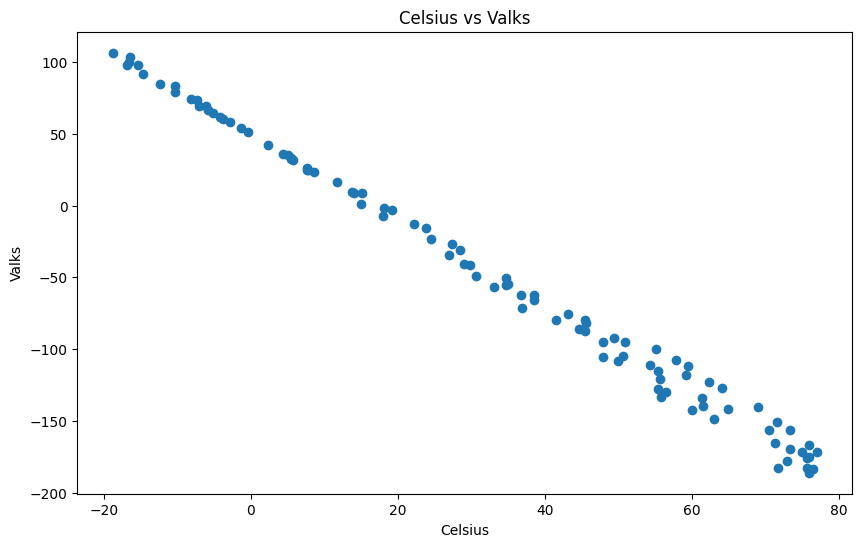

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Celsius'], data['Valks'])
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Celsius vs Valks')
plt.show()

# **Inicio de Modelo**

Tasa de aprendizaje óptima: 0.001
Theta final: [49.49356635 -2.98614431]
Costo final (entrenamiento): 18.767722180163936
Costo final (prueba): 36.503937257264454


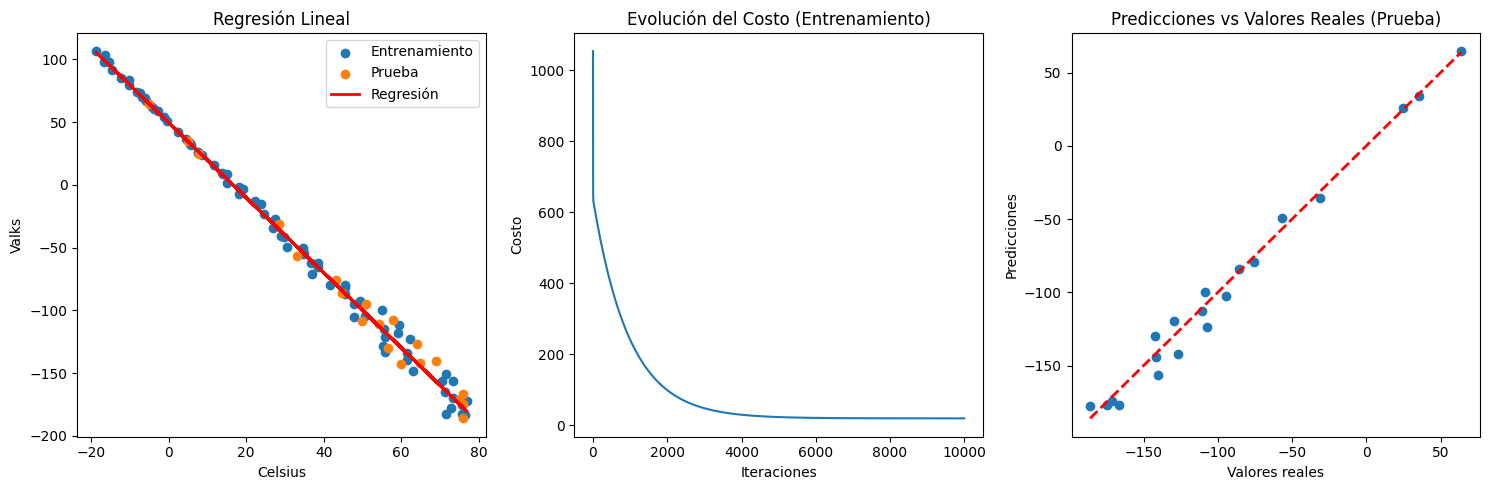

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    n_test = int(n * test_size)
    indices = np.random.permutation(n)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Añadir una columna de unos para el término de sesgo
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

# Inicializar parámetros
theta = np.random.randn(2, 1)
n_iterations = 10000

# Función para calcular el costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Función para realizar el descenso del gradiente
def gradient_descent(X, y, theta, n_iterations, alpha):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations, 2))

    for it in range(n_iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = compute_cost(X, y, theta)

    return theta, cost_history, theta_history

# Búsqueda de la tasa de aprendizaje óptima
alphas = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
costs = []

for alpha in alphas:
    theta_temp, cost_history, _ = gradient_descent(X_train_b, y_train, theta, n_iterations, alpha)
    costs.append(cost_history[-1])

optimal_alpha = alphas[np.argmin(costs)]

# Ejecutar el descenso del gradiente con la tasa de aprendizaje óptima
theta, cost_history, theta_history = gradient_descent(X_train_b, y_train, theta, n_iterations, optimal_alpha)

# Predecir usando el conjunto de prueba
y_pred = X_test_b.dot(theta)

# Calcular el costo para el conjunto de prueba
test_cost = compute_cost(X_test_b, y_test, theta)

# Imprimir resultados
print(f"Tasa de aprendizaje óptima: {optimal_alpha}")
print(f"Theta final: {theta.ravel()}")
print(f"Costo final (entrenamiento): {cost_history[-1]}")
print(f"Costo final (prueba): {test_cost}")

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Graficar los datos y la línea de regresión
plt.subplot(131)
plt.scatter(X_train, y_train, label='Entrenamiento')
plt.scatter(X_test, y_test, label='Prueba')
plt.plot(X, add_bias(X).dot(theta), color='red', linewidth=2, label='Regresión')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión Lineal')
plt.legend()

# Graficar la evolución del costo
plt.subplot(132)
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del Costo (Entrenamiento)')

# Graficar predicciones vs valores reales
plt.subplot(133)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Prueba)')

plt.tight_layout()
plt.show()